<a href="https://colab.research.google.com/github/damilolas/my-first-machine-learning-project-python-/blob/main/2111314_FAKE_NEWS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**
The emergence of the World Wide Web and the quick uptake of social media platforms (like Facebook and Twitter) have made it possible for information to be disseminated in ways that have never previously been seen in the history of humanity. Consumers are creating and disseminating more information than ever because to the widespread use of social media platforms, some of which is false and irrelevant to reality. The automated identification of misinformation or disinformation in a written article is a difficult undertaking. Before passing judgement on an article's veracity, even a subject matter expert must consider a number of factors. In this paper, we suggest an automatic classification method for news items based on machine learning ensemble. Our study investigates many textual characteristics that can be utilised to distinguish between authentic and fraudulent contents. We train a variety of machine learning algorithms using various ensemble approaches based on those qualities and assess their performance on four real-world datasets. 


# **Introduction**
The emergence of the World Wide Web and the quick uptake of social media platforms (like Facebook and Twitter) have made it possible for information to be disseminated in ways that have never previously been seen in the history of humanity. In addition to other applications, news organisations benefited from the extensive usage of social media platforms by updating their subscribers' news in almost real-time. Newspapers, tabloids, and magazines gave way to online news sources, blogs, social media feeds, and other digital media formats as the news media transitioned from print to digital.[1] (https://journals.sagepub.com/doi/10.1177/1081180X05284317)In the past ten years, the dissemination of fake news has rapidly increased, with the 2016 US elections being the most notable example. Numerous issues have arisen as a result of the widespread dissemination of untruthful materials online, not only in politics but also in a number of other fields, including sports, health, and science. The financial markets are one of these areas that are impacted by false news, where a rumour can have severe repercussions and even stop the market in its tracks.


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [34]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

In [35]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [36]:
df_true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [37]:
df_fake["class"] = 0
df_true["class"] = 1

In [38]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [39]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [40]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [41]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [42]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [43]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [44]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [50]:
#Merging True and Fake Dataframes¶
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [51]:

df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

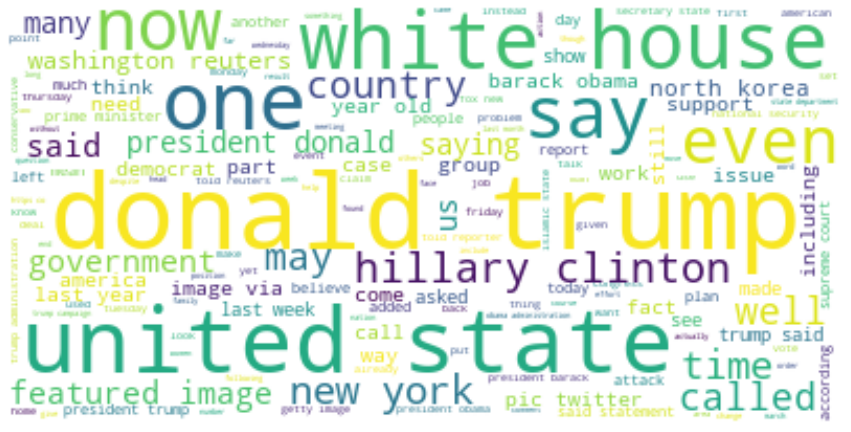

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
#Removing columns which are not required¶
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [68]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [69]:
#Random Shuffling the dataframe
df = df.sample(frac = 1)

In [70]:
df.head()


,text,class
20348,Obama drone Gwyneth Paltrow can t understand w...,0
13142,TEGUCIGALPA (Reuters) - Hondurans spilled into...,1
9757,WASHINGTON (Reuters) - A Republican political ...,1
20270,RIYADH (Reuters) - A panel set up by the Saudi...,1
5484,"When Bill O Reilly calls himself a journalist,...",0


In [58]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [59]:
df.columns

Index(['text', 'class'], dtype='object')

In [60]:
df.head()


,text,class
0,WASHINGTON (Reuters) - The White House said Vi...,1
1,When you consider the stunning ways students a...,0
2,WASHINGTON (Reuters) - President-elect Donald ...,1
3,In light of Republican failure to pass the Ame...,0
4,WASHINGTON (Reuters) - Donald Trump’s vice pre...,1


In [61]:
#Creating a function to process the texts¶
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [62]:
df["text"] = df["text"].apply(wordopt)

In [63]:
#Defining dependent and independent variables¶
x = df["text"]
y = df["class"]

In [64]:
#Splitting Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [71]:
#Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [78]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [80]:
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9872549019607844

In [81]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5774
           1       0.99      0.99      0.99      5446

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [82]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [83]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.996969696969697

In [84]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5774
           1       1.00      1.00      1.00      5446

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [85]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [86]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.989126559714795

In [87]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5774
           1       0.99      0.99      0.99      5446

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [97]:
#Model Testing
def output_lable(n):
    if n == 0:
        return "This is a fake News"
    elif n == 1:
        return "News is not fake"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [98]:
news = str(input())
manual_testing(news)

Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68.


IndexError: ignored